# Homework #2 Part I: <br>Prove that as a function of $\theta$...

---

$$
\begin{align*}
&\color{white}{\propto}{} \exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right] \\
&\propto{}  
\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)
\end{align*}$$

### Hint 1: expand the squares, and rebuild the quadratic in terms of $\theta$...
### Hint 2: anything that's not $\theta$ is a constant... and you can drop or multiply by any constants you want to complete the square...

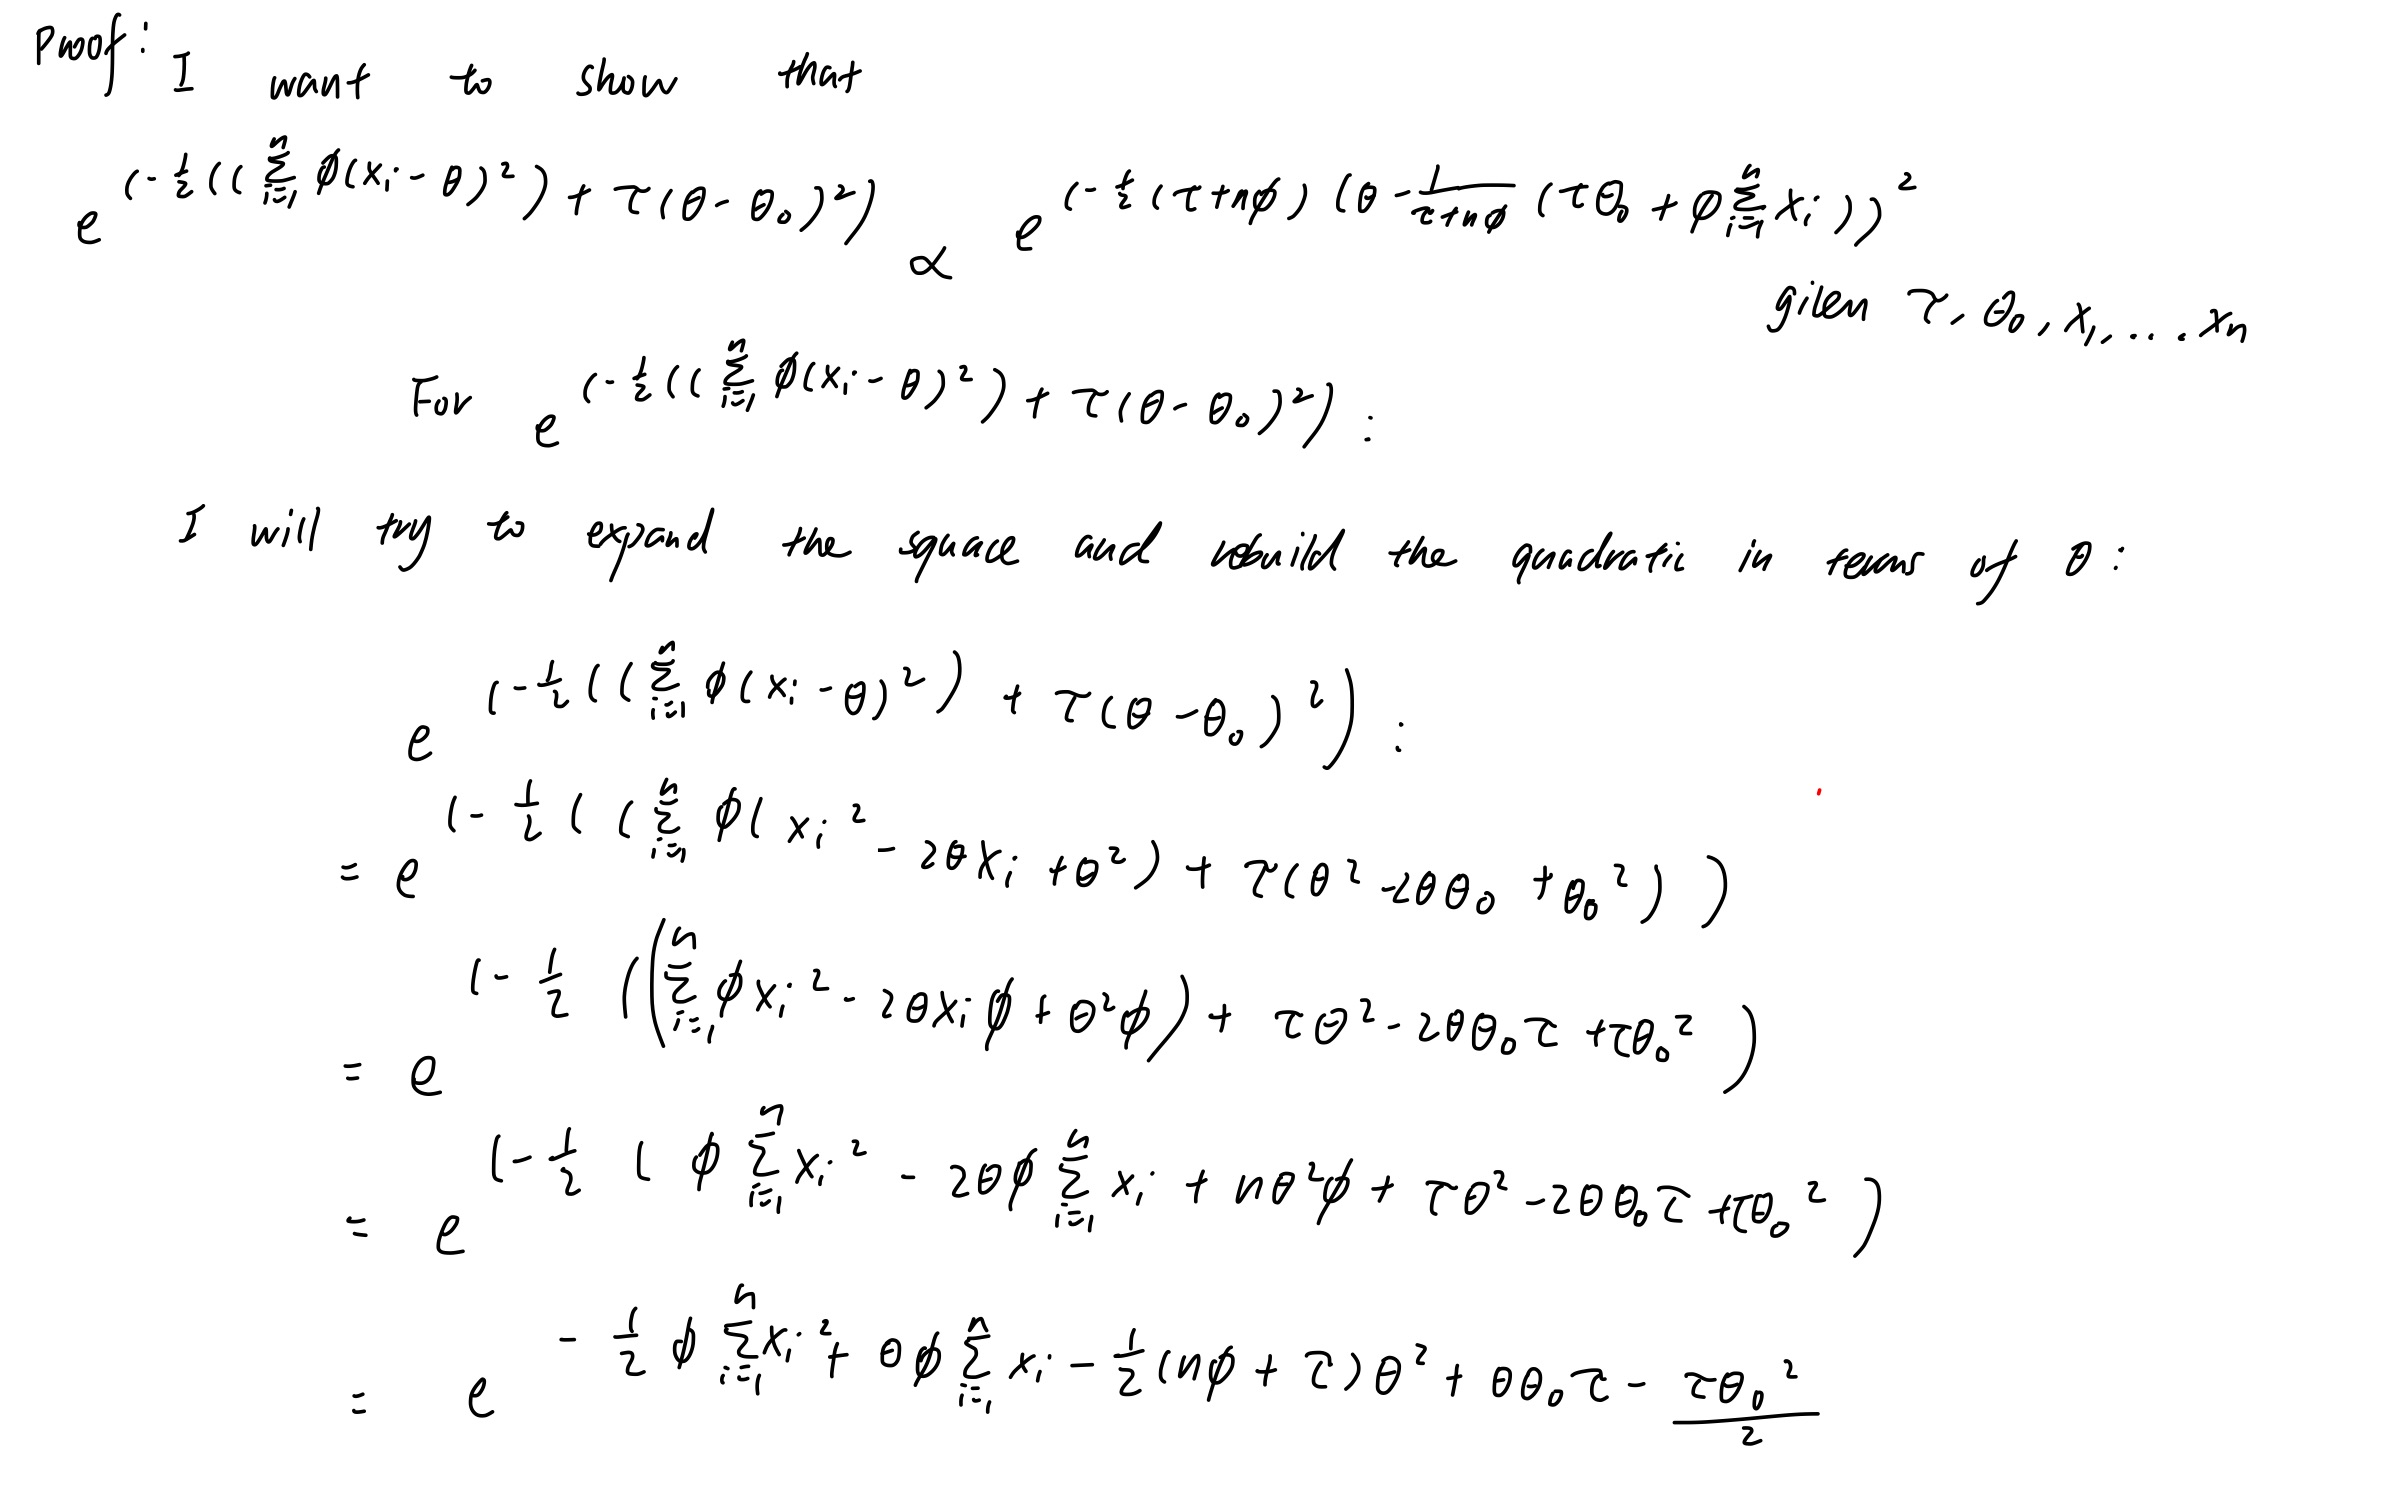

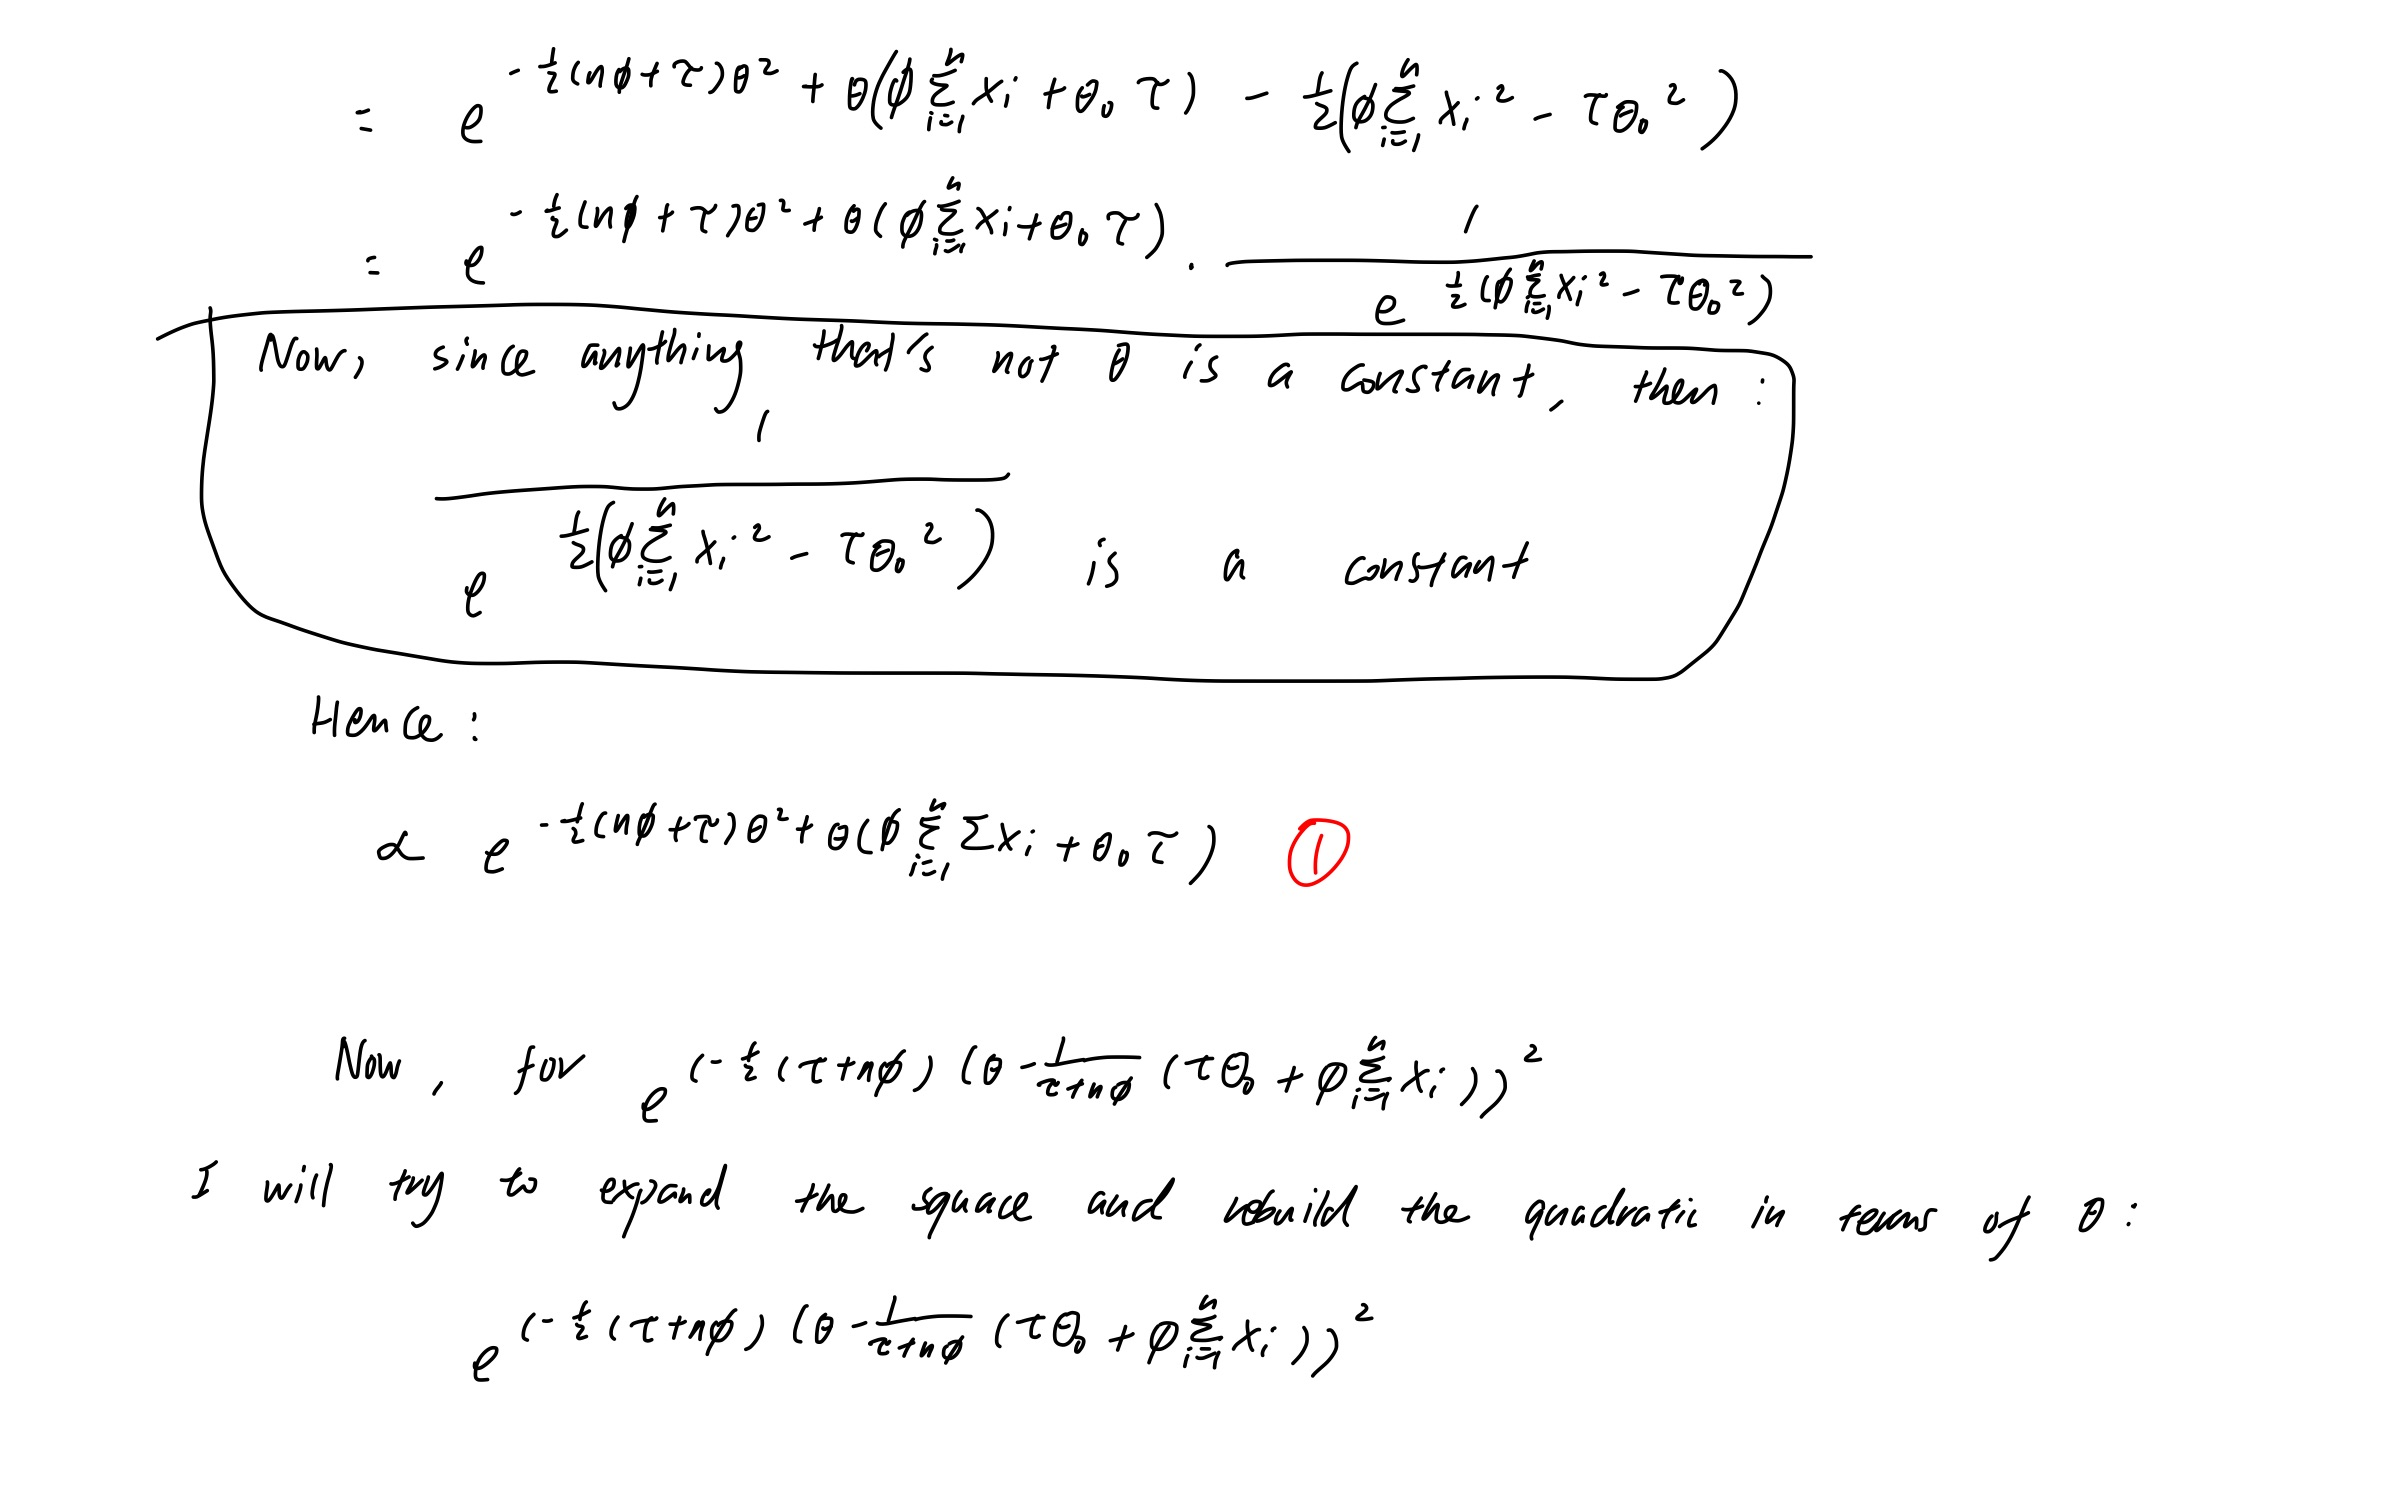

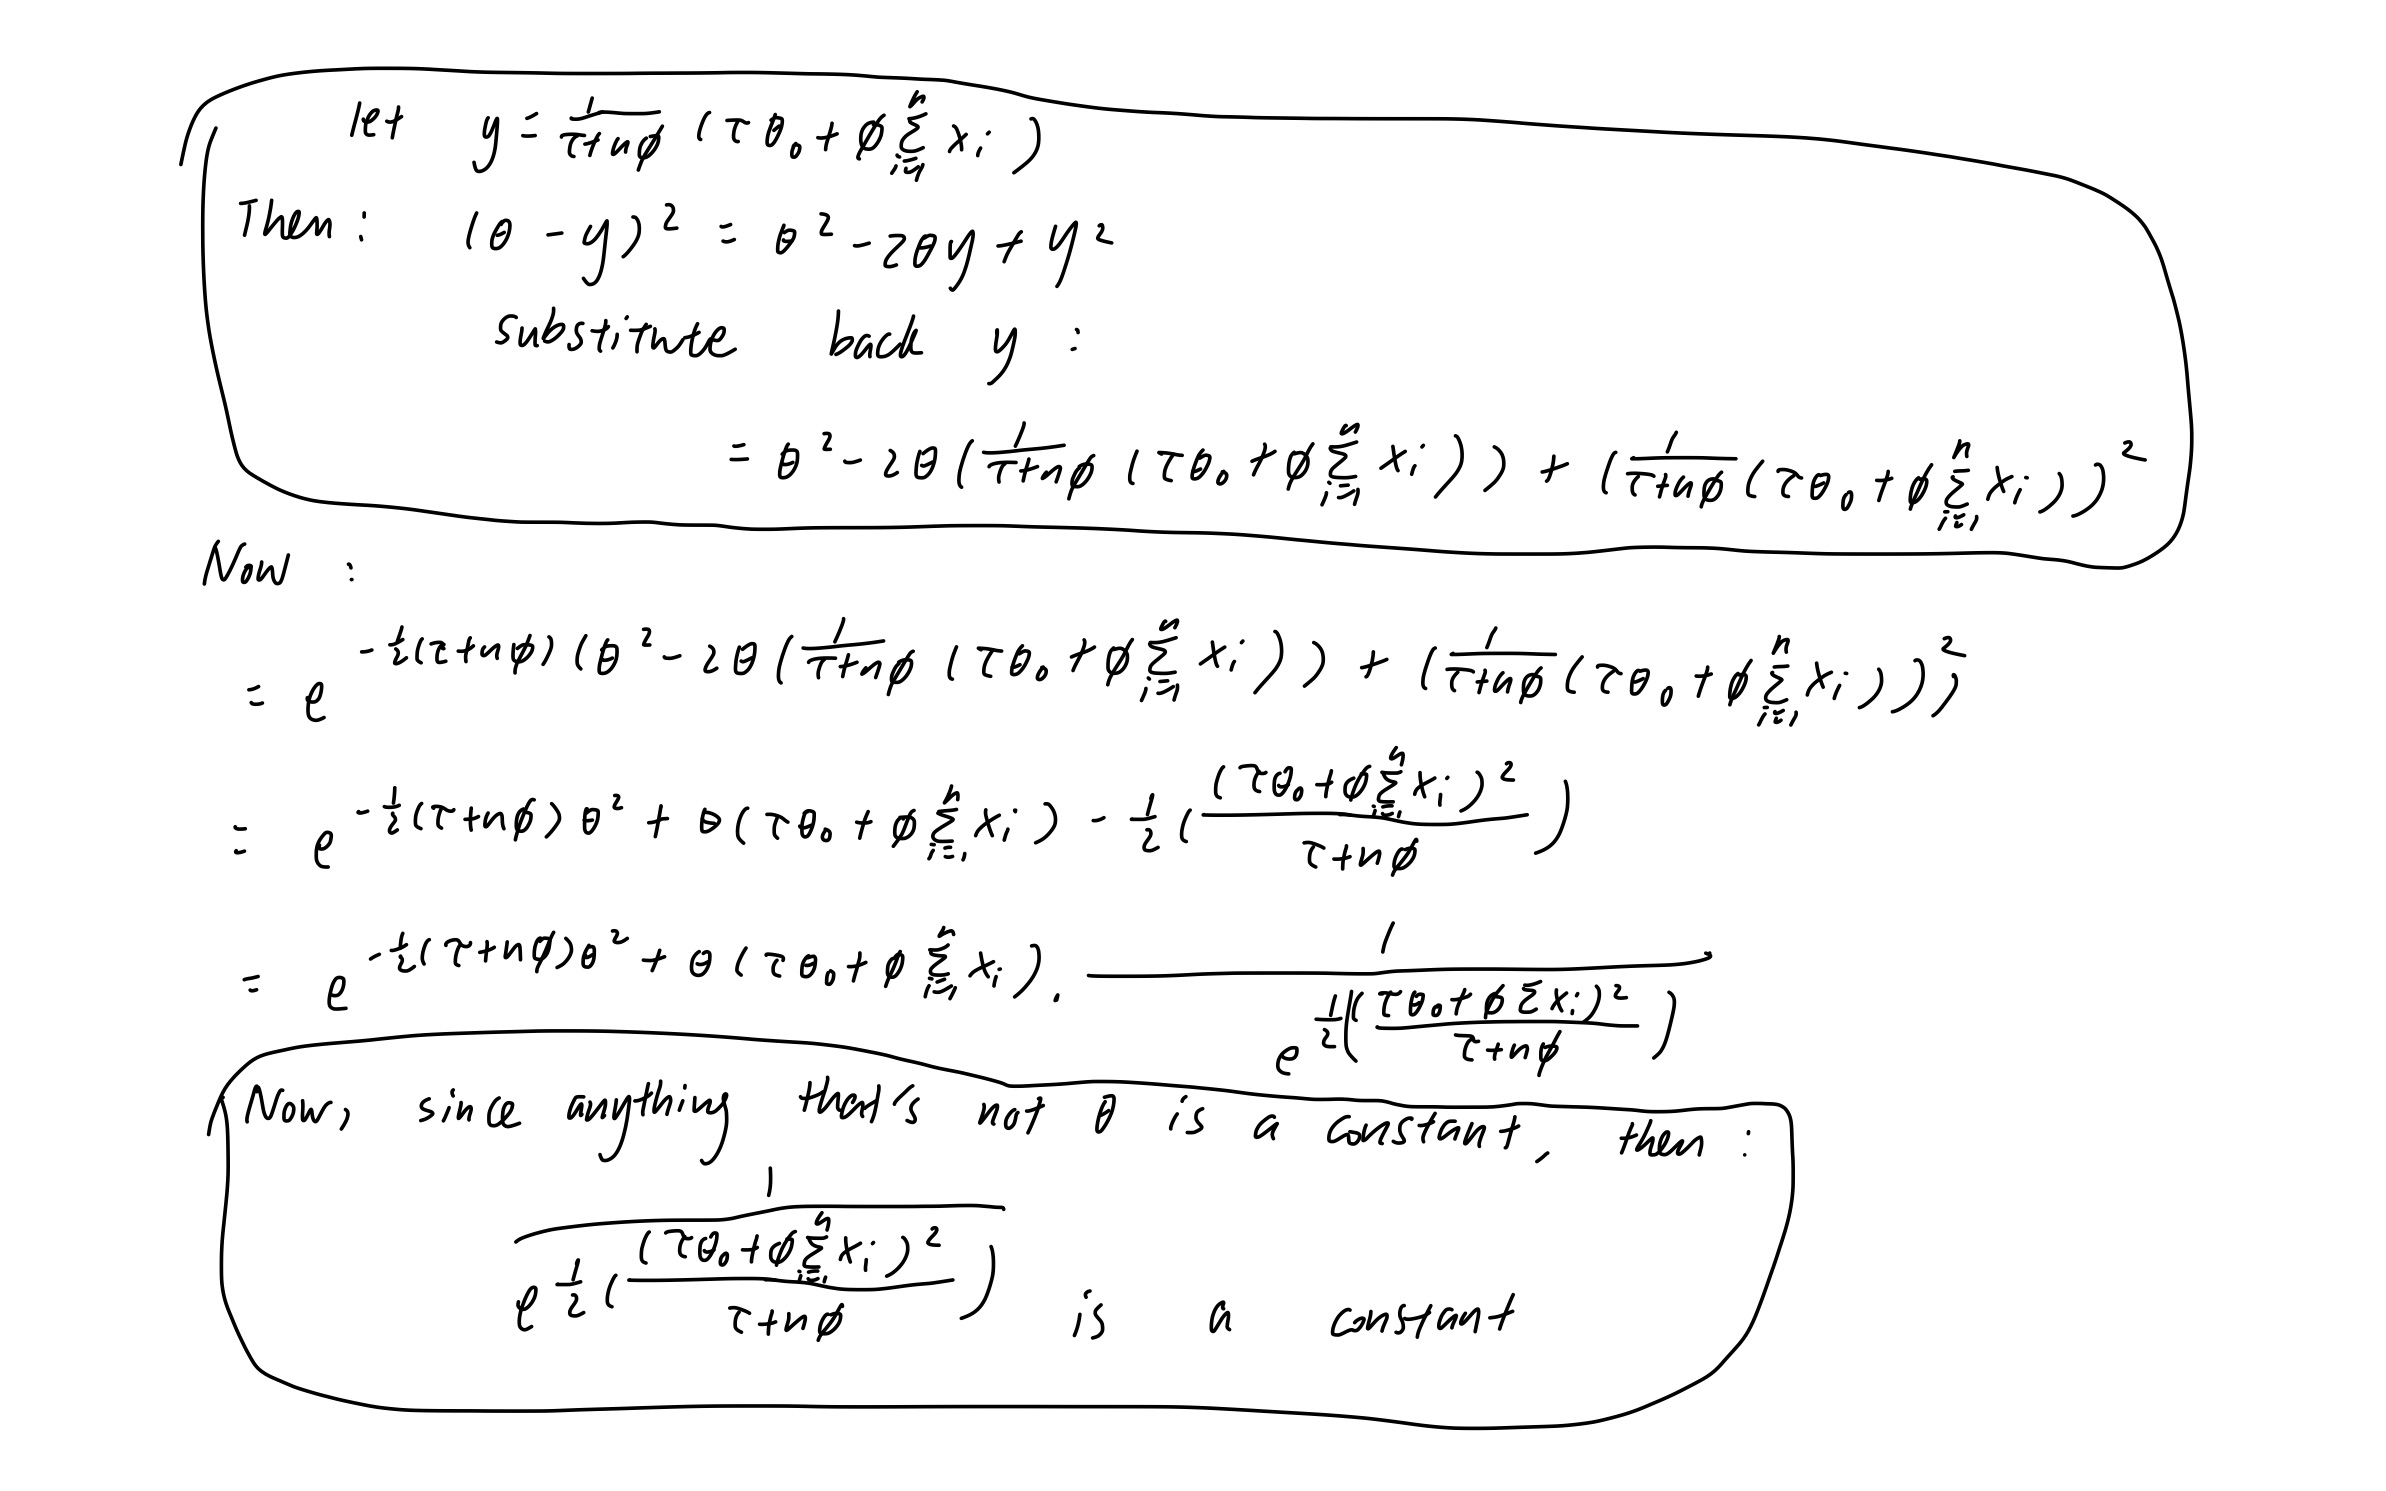

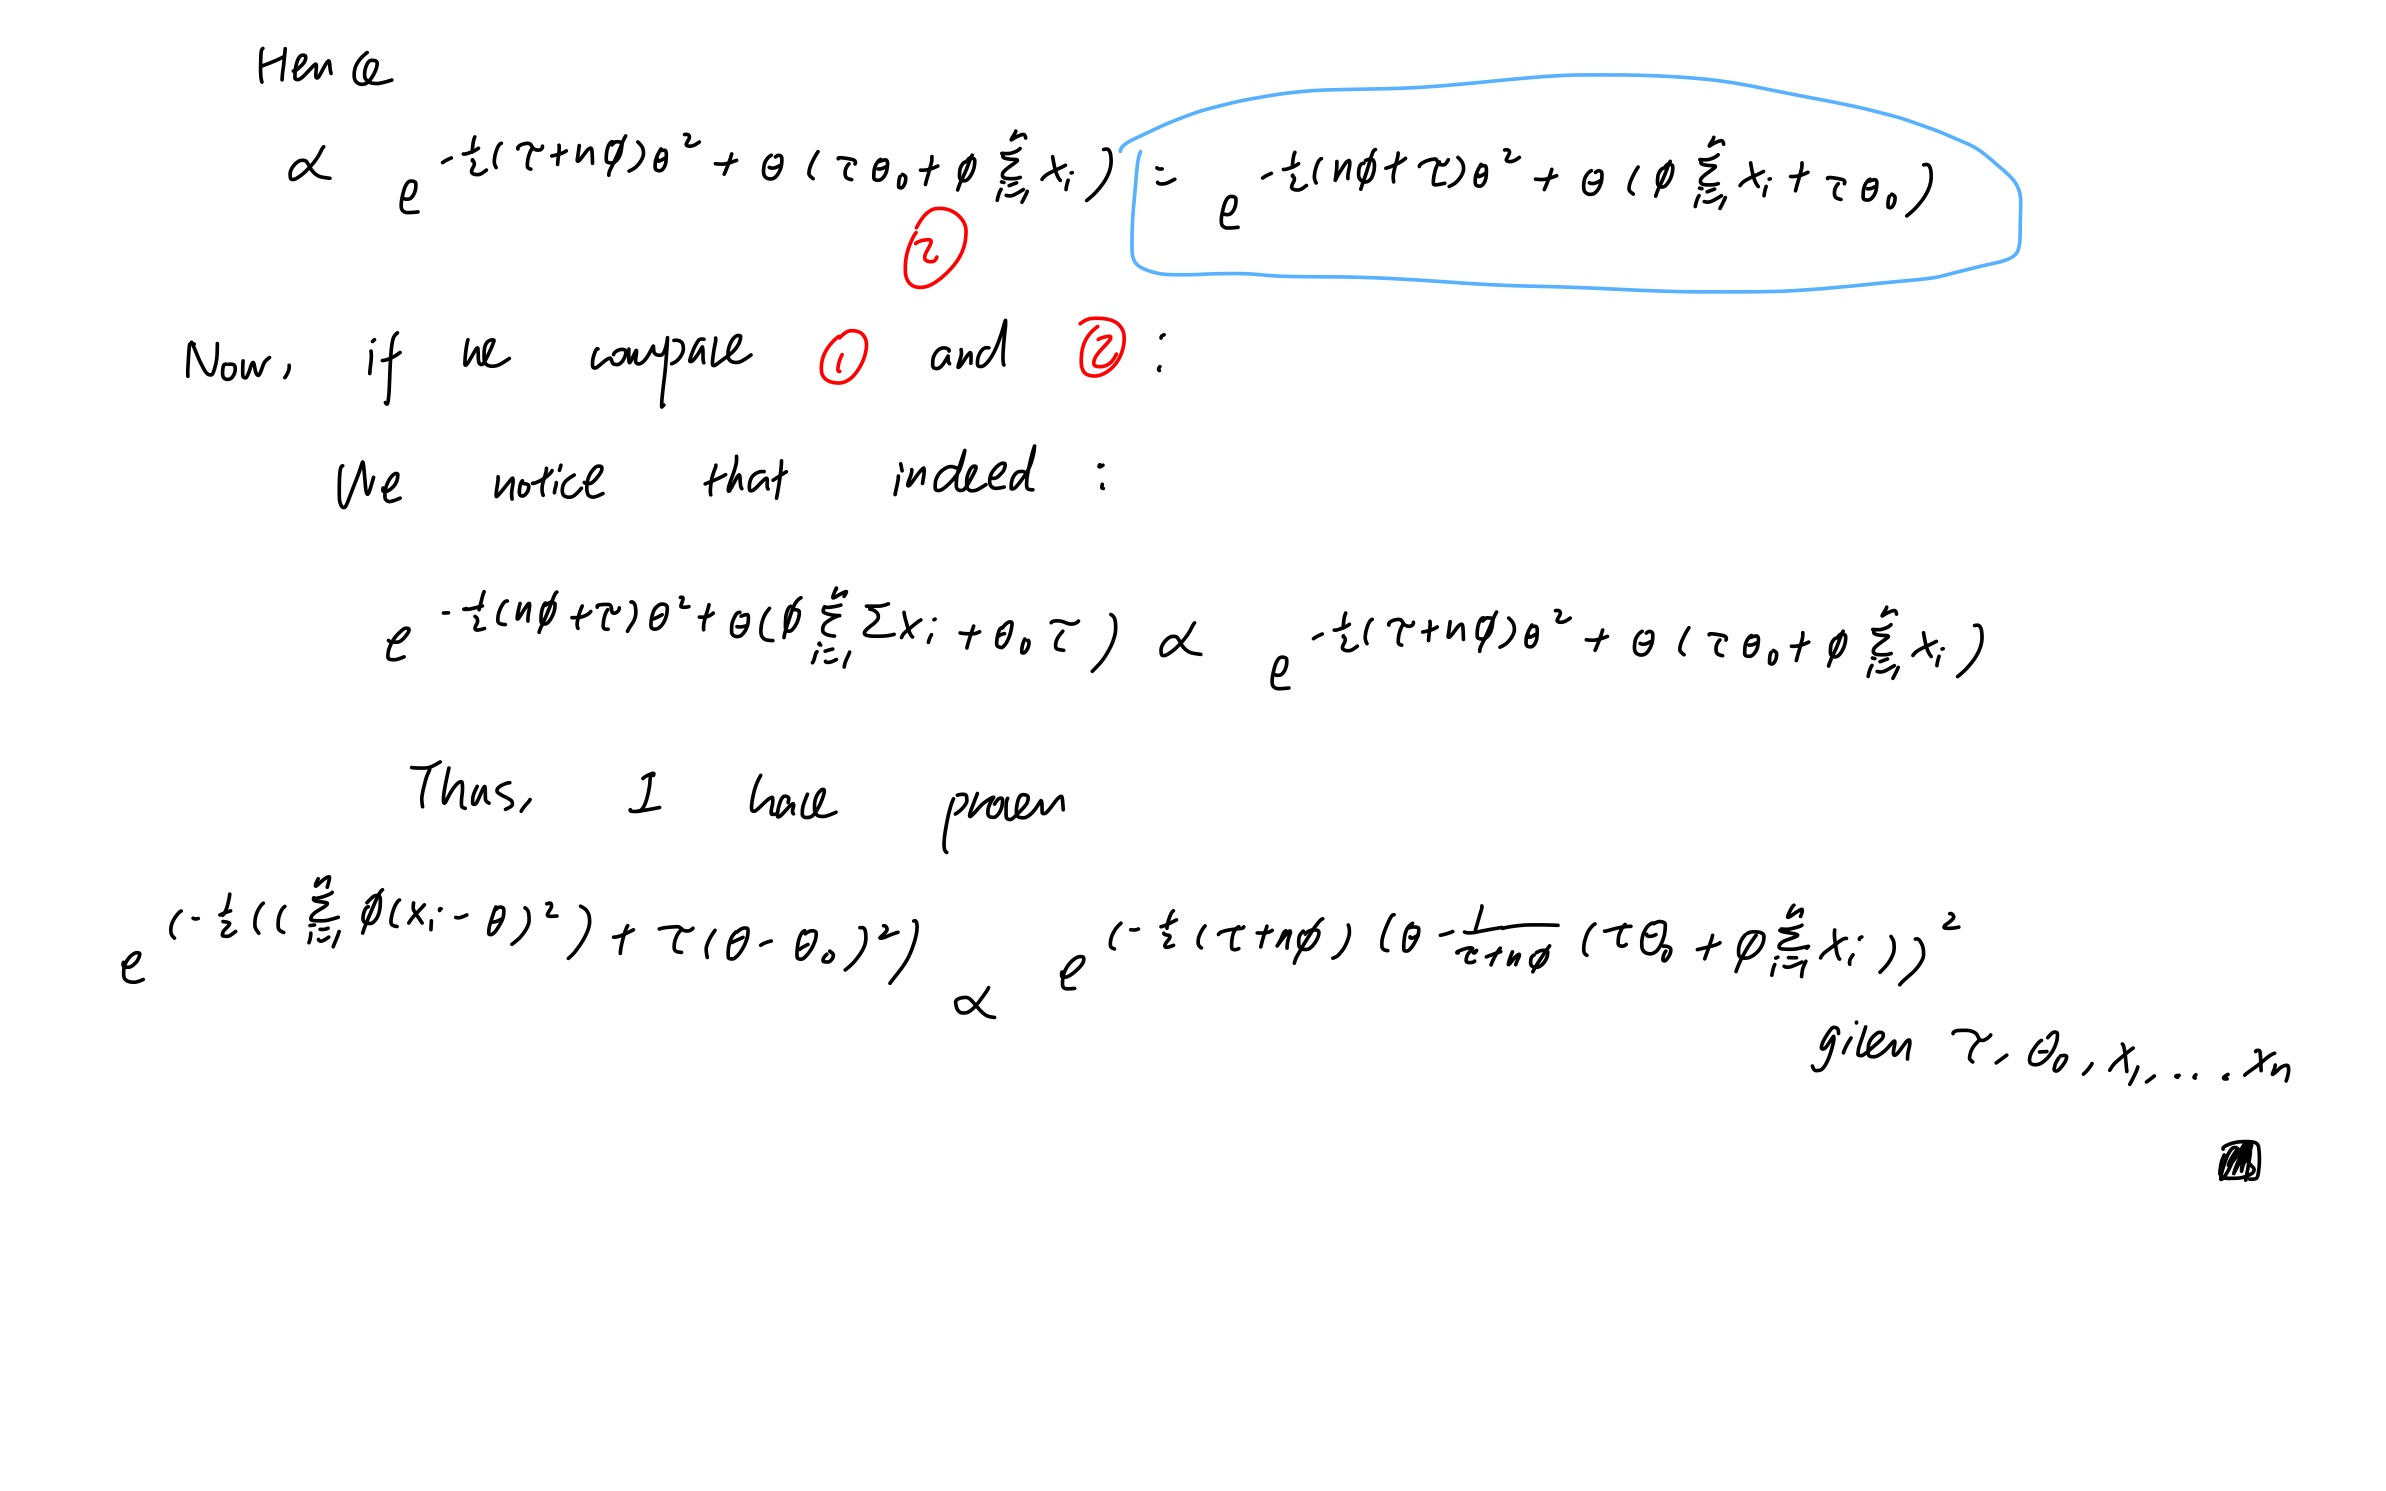

# Homework #2 Part II: Complete the following... 

1. Make the "Classic Bayes" figure, but instead of a single likelihood, plot the individual likelihoods of each observation. *Hint: Consider the code...*
    
    ```python
    for xi in range(x):
        print(xi)
    ```     
2. Make the "Classic Bayes" figure for the normal-normal model on a log scale. *Hint: plot loglikehood, prior logpdf, and the log of the joint distribution using* `stats.norm.logpdf()`
    
3. What is the ***posterior distribution*** of a **normal likelihood** with $p(\theta) \propto 1$?
4. What's the difference between a ***log likelihood*** and ***log posterior*** when an ***improper prior*** is used? *Hint: is has something to do with the* ***log of the marginal likelihood constant***. [Or, another way to start thinking about this is to instead as the question: What's the difference between a ***likelihood*** and ***posterior*** when an ***improper prior*** is used? *Hint: is has something to do with the* ***marginal likelihood constant***.]

<!-- posterior proporitional to joint... --> 


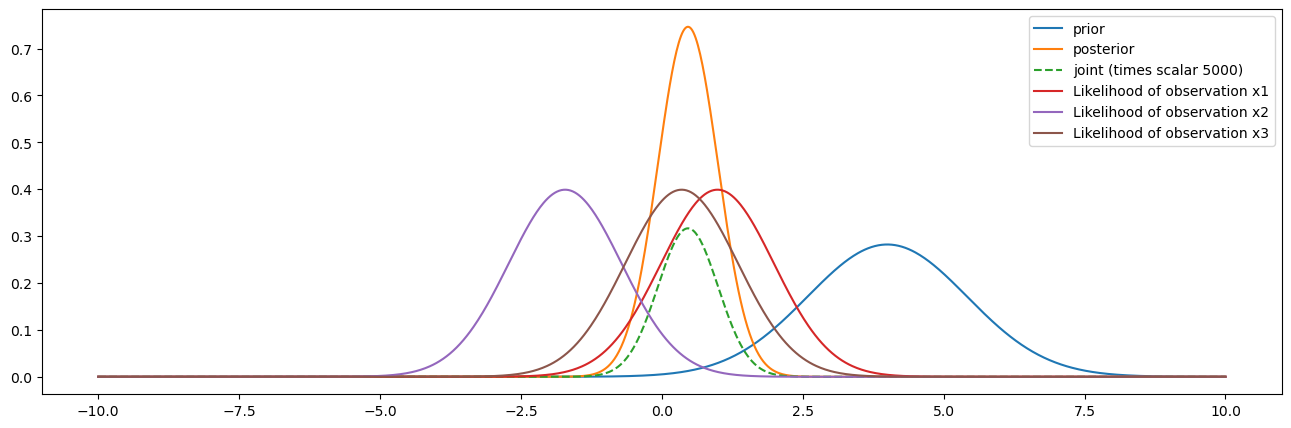

In [3]:
#Question 2 part 1:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
np.random.seed(301)
n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001);
#Setting up individual likelihoods of each observation
likelihoods=[]
for xi in x:
    likelihoods.append(stats.norm.pdf(parameter_domain, loc=xi, scale=1))
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)
c,c2 = 5000,10; 
joint = c*np.prod(likelihoods, axis=0) * prior
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)
#Plotting my distributions like Classic Bayes
plt.figure(figsize=(16, 5)); 
plt.plot(parameter_domain, prior, label="prior"); 
plt.plot(parameter_domain, posterior, label="posterior"); 
plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")");
#Plottung the individual likelihoods of each observation
obs=0
for individual in likelihoods:
    obs+=1
    plt.plot(parameter_domain, individual, label="Likelihood of observation x"+ str(obs)); plt.legend();



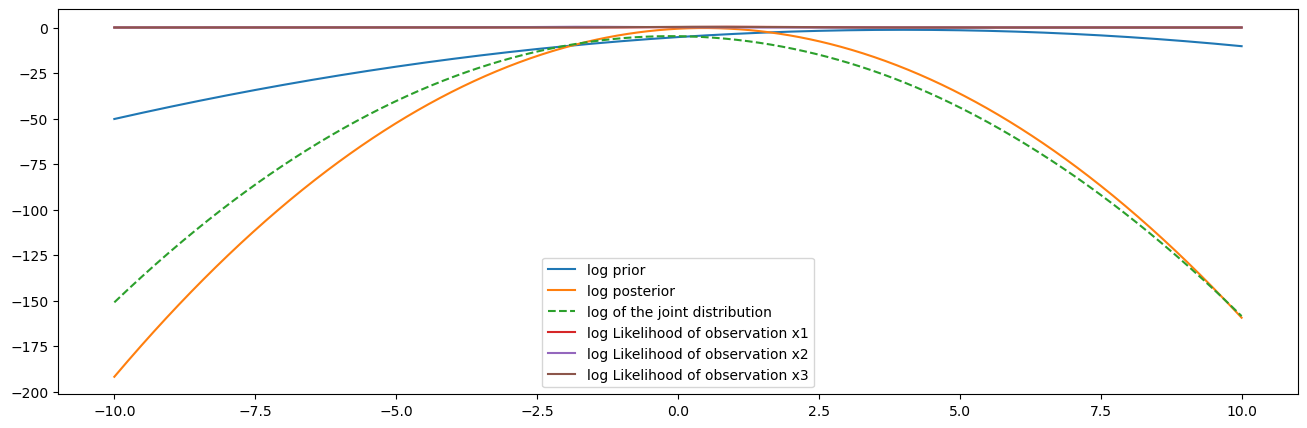

In [8]:
#Question 2 part 2:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
np.random.seed(301)
n = 3; x = stats.norm(loc=0,scale=1).rvs(n);theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001);
#Setting up individual loglikelihoods of each observation
likelihoods_log=[]
for xi in x:
    likelihoods_log.append(stats.norm.logpdf(parameter_domain, loc=xi, scale=1))
prior_log = stats.norm.logpdf(parameter_domain,loc=theta_0, scale=1/tau**0.5)
c,c2 = 3000,10; 
#Here, since we are calculating the log of the joint distribution.
#By logrithm rules, log(a*b)=log(a)+log(b)
#We will first calculate the log of the product of the 3 likelihoods, here we are adding them together (Again, by logrithm rule)
joint_log = np.array(likelihoods_log).sum(axis=0)+prior
posterior_log = stats.norm.logpdf(parameter_domain,loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5)
#Plotting my distributions like Classic Bayes
plt.figure(figsize=(16, 5)); 
plt.plot(parameter_domain, prior_log, label="log prior"); 
plt.plot(parameter_domain, posterior_log, label="log posterior"); 
plt.plot(parameter_domain, joint_log, linestyle="--", label="log of the joint distribution");
#Plottung the individual likelihoods of each observation
obs=0
for individual in likelihoods:
    obs+=1
    plt.plot(parameter_domain, individual, label="log Likelihood of observation x"+ str(obs)); plt.legend();

3. What is the posterior distribution of a normal likelihood with $p(\theta) \propto 1$?
$$\small
\begin{align*}
\text{The normal likelihood is given by:}\quad\quad\quad\quad\quad\quad\quad\\
p(x|\theta,\phi=\sigma^{-2}) &={} \prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}} \quad [\textbf{precision }\phi=\sigma^{-2}\text{ given}]\quad\quad\quad\quad\quad\quad\quad\\
\text{In the case of a normal likelehood with prior } p(\theta) \propto 1:\\
\text{We know that posterior distribution } p(\theta \mid x)&\propto p(x|\theta) p(\theta)\\
&\propto  {} \prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}}\\
\text{Then, we see that the posterior is still a normal distribution.}
\end{align*}$$


4.What's the difference between a log likelihood and log posterior when an improper prior is used? Hint: is has something to do with the log of the marginal likelihood constant. [Or, another way to start thinking about this is to instead as the question: What's the difference between a likelihood and posterior when an improper prior is used? Hint: is has something to do with the marginal likelihood constant.]
\begin{align*}
&\text{When an improper prior is used:}\quad\\
&\text{likelihood will not be affected by an improper prior, as it's only relavent to the data and model parameter. }\\\\
&\text{In the case of posterior, since posterior are derived from both prior and likelihood. If the prior is improper, then we might ends up with an }\\
&\text{improper posterior (doesn't integrate to 1 thus not a probability distribution). If the likelihood is informative enough, then our potsterior }\\
&\text{will rely more on the likelihood instead of on the improper prior (more weight will be shifted to likelihood).}\\
&\text{Here, marginal likelihood constant is used to normalize the joint so that the 
posterior distribution will have an area of 1.}\\
&\text{Hence, with an improper prior, our posterior being proper or not relys on whether our likelihood is informative enough such that the marginal}\\
&\text{normalizing constant is sufficient to normalize the joint distribution.} 
\end{align*}
